# Exploratory Data Analysis
___

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('../data/listings.csv', low_memory = False)

In [12]:
# I am curious to see the correlation heatmap for the different review metrics
rev = df[['review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication',
         'review_scores_location', 'review_scores_rating', 'review_scores_value']]

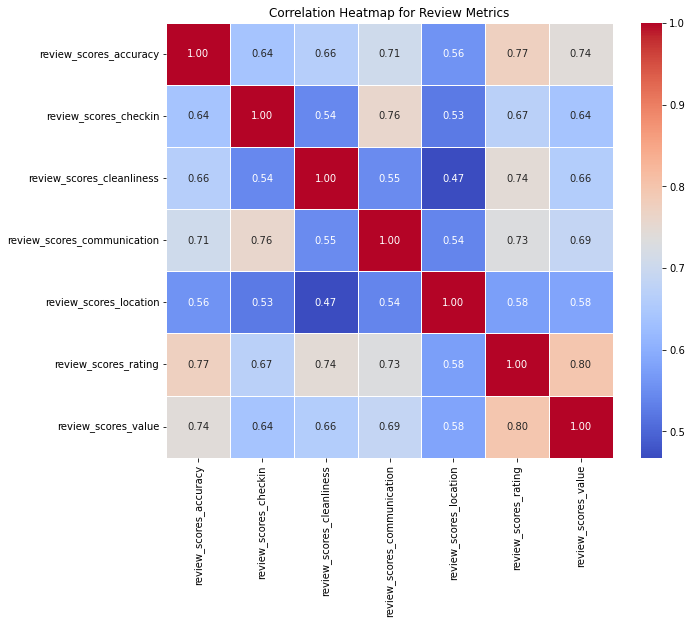

In [13]:
# Calculate the correlation matrix
corr_matrix = rev.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Review Metrics')
plt.savefig('../images/correlation_heatmap.jpg')

In [14]:
# Here we see high correlation between quite a few review metrics:
    # value and rating
    # value and accuracy 
    # rating and accuracy 
    # checkin and communication

In [15]:
# Next we will look at the heatmap for the numeric predictors which will be used in regression 
pf = pd.read_csv('../data/03_data.csv')
pf.head()

,Unnamed: 0,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,0,83.0,within a day,100.0,17.0,0.0,4,2.0,4.63,4.67,4.52,4.64,4.69,4.92,4.62
1,2,116.0,within a few hours,100.0,99.0,0.0,4,2.0,4.69,4.73,4.73,4.78,4.79,4.72,4.62
2,3,70.0,within a few hours,100.0,47.0,0.0,1,1.0,4.68,5.00,4.85,4.70,4.85,4.60,4.45
3,4,100.0,within a day,100.0,100.0,0.0,2,2.0,4.40,4.07,4.47,4.80,4.73,4.87,4.00
4,8,25.0,within an hour,100.0,96.0,1.0,2,1.0,4.77,4.82,4.71,4.89,4.92,4.87,4.65


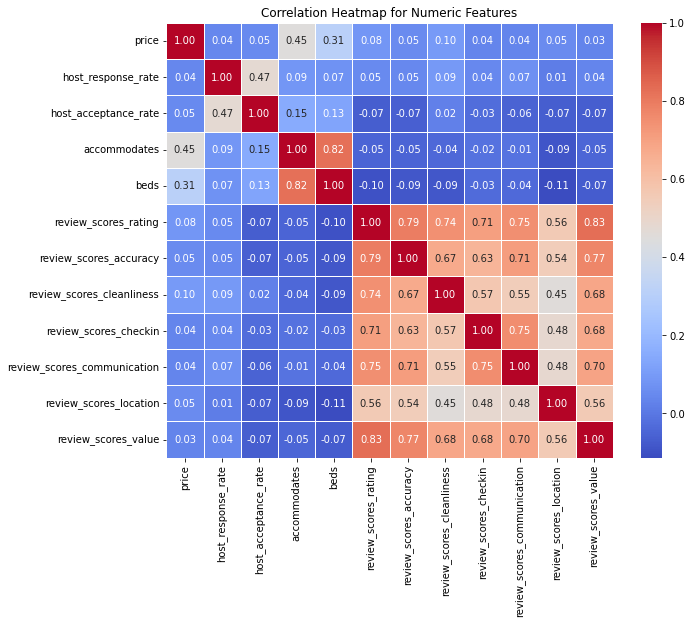

In [16]:
pf_filtered = pf.drop(columns=['host_is_superhost', 'host_response_time', 'Unnamed: 0'])

# Correlation matrix
corr_matrix = pf_filtered.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Features')
plt.savefig('../images/all_correlation_heatmap.jpg')

In [17]:
# We have some high correlations here which is not ideal
    # 0.82 between beds and accomadations 
    # generally high correlations between review metrics
# Interesting how price is not correlated to acceptance rate 

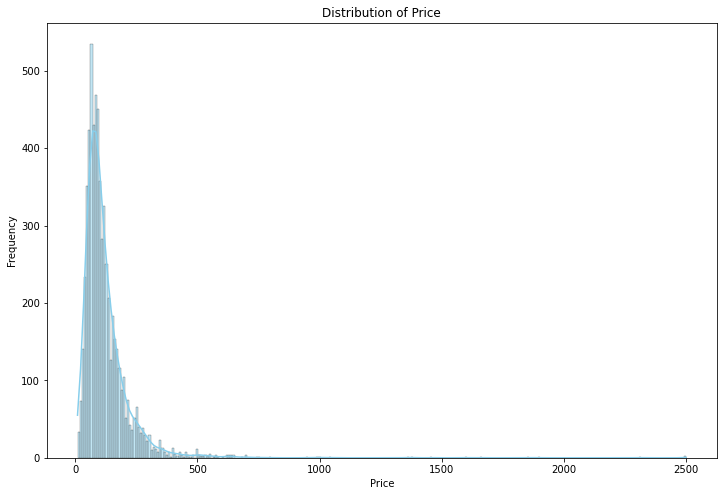

In [18]:
# Let's look at the distribution for price
plt.figure(figsize=(12, 8))
sns.histplot(pf['price'], kde=True, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('../images/price_distribution.jpg')
# The distribution looks gamma distributed (around beta = 1, alpha > 3)